#📌 Extracción

In [1]:
import pandas as pd
import numpy as np

In [2]:
datos = pd.read_json('TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
costumer_id = datos[['customerID', 'Churn']]
costumer_id.head(5)

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [4]:
customer = pd.json_normalize(datos['customer'])
customer.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [5]:
phone = pd.json_normalize(datos['phone'])
phone.head(5)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [6]:
internet = pd.json_normalize(datos['internet'])
internet.head(5)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [7]:
account = pd.json_normalize(datos['account'])
account.head(5)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
datos_completos = pd.concat([costumer_id, customer, phone, internet, account], axis=1)
datos_completos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [9]:
columnas = list(datos_completos.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [10]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
datos_completos['tenure'] = datos_completos['tenure'].astype(np.int64)
datos_completos['Charges.Total'] = datos_completos['Charges.Total'].apply(lambda x: x.replace(" ", "").strip())
datos_completos['Charges.Total'] = datos_completos['Charges.Total'].replace('', np.nan)
datos_completos['Charges.Total'] = datos_completos['Charges.Total'].astype(np.float64)
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
datos_completos = datos_completos.replace('', np.nan)
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
datos_completos.dropna(inplace=True)
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [14]:
for columna in datos_completos.columns:
  print(f'{columna}: {datos_completos[columna].unique()}')

#print(f'{datos_completos.columns[1]}: {datos_completos.iloc[:,1].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit ca

In [15]:
datos_completos[(datos_completos['OnlineBackup']=='No') & (datos_completos['InternetService']=='Fiber optic')].head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [16]:
datos_completos.columns = datos_completos.columns.str.replace('.','_').str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()
datos_completos.head(2)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [17]:
datos_completos['cuentas_diarias'] = datos_completos['charges_monthly'] / 30
datos_completos.head(2)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


#📊 Carga y análisis

In [18]:
datos_completos.describe()

,senior_citizen,tenure,charges_monthly,charges_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [19]:
evasion = pd.DataFrame(datos_completos['churn'].value_counts())
evasion

,count
churn,
No,5163
Yes,1869


In [20]:
import matplotlib.pyplot as plt

/tmp/ipython-input-1133282263.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(0, evasion['count'][0], evasion['count'][0], ha='center', va='bottom', fontsize=12)
/tmp/ipython-input-1133282263.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(1, evasion['count'][1], evasion['count'][1], ha='center', va='bottom', fontsize=12)


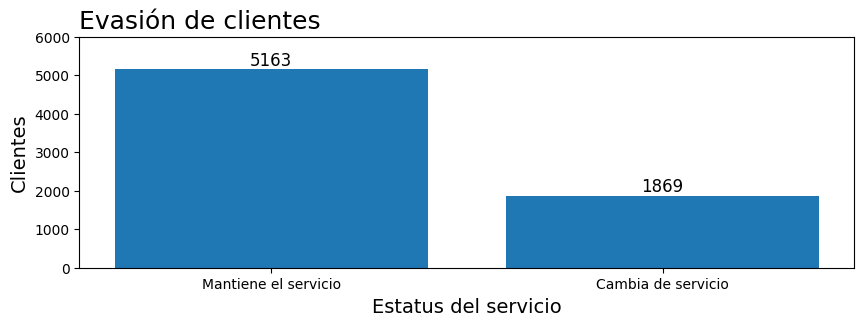

In [21]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(evasion.index, evasion['count'])
ax.set_title('Evasión de clientes', fontsize=18, loc='left')
ax.set_xlabel('Estatus del servicio', fontsize=14)
ax.set_ylabel('Clientes', fontsize=14)
ax.set_ylim(0, 6000)
ax.text(0, evasion['count'][0], evasion['count'][0], ha='center', va='bottom', fontsize=12)
ax.text(1, evasion['count'][1], evasion['count'][1], ha='center', va='bottom', fontsize=12)
etiquetas = ['Mantiene el servicio', 'Cambia de servicio']
plt.xticks(evasion.index, etiquetas)
plt.show()

In [22]:
evasion_por_genero = datos_completos.groupby(datos_completos['gender'])['churn'].value_counts()
evasion_por_genero

gender  churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: count, dtype: int64

In [23]:
ev_tipo_contrato = datos_completos.groupby(datos_completos['churn'])['contract'].value_counts()
ev_tipo_contrato

churn  contract      
No     Month-to-month    2220
       Two year          1637
       One year          1306
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: count, dtype: int64

In [24]:
ev_metodo_pago = datos_completos.groupby(datos_completos['churn'])['payment_method'].value_counts()
ev_metodo_pago

churn  payment_method           
No     Mailed check                 1296
       Electronic check             1294
       Credit card (automatic)      1289
       Bank transfer (automatic)    1284
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: count, dtype: int64

In [25]:
ev_telefono = datos_completos.groupby(datos_completos['churn'])[['phone_service', 'internet_service']].value_counts()
ev_telefono

churn  phone_service  internet_service
No     Yes            Fiber optic         1799
                      DSL                 1447
                      No                  1407
       No             DSL                  510
Yes    Yes            Fiber optic         1297
                      DSL                  289
       No             DSL                  170
       Yes            No                   113
Name: count, dtype: int64

In [26]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   object 
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   object 
 5   dependents         7032 non-null   object 
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   object 
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

In [27]:
ev_cargos = datos_completos.groupby(datos_completos['churn'])[['charges_monthly', 'charges_total', 'cuentas_diarias']].mean()
ev_cargos

,charges_monthly,charges_total,cuentas_diarias
churn,,,
No,61.307408,2555.344141,2.043580
Yes,74.441332,1531.796094,2.481378


In [28]:
ev_mensual = 100 * ev_cargos['charges_monthly'].to_numpy() / ev_cargos['charges_monthly'].sum()
ev_total = 100 * ev_cargos['charges_total'].to_numpy() / ev_cargos['charges_total'].sum()
ev_diaria = 100 * ev_cargos['cuentas_diarias'].to_numpy() / ev_cargos['cuentas_diarias'].sum()
ev_cargos_porcentual = pd.DataFrame({'Mensual': ev_mensual, 'Total': ev_total, 'Diaria': ev_diaria}, index=['No', 'Si'])
ev_cargos_porcentual

,Mensual,Total,Diaria
No,45.162414,62.521568,45.162414
Si,54.837586,37.478432,54.837586


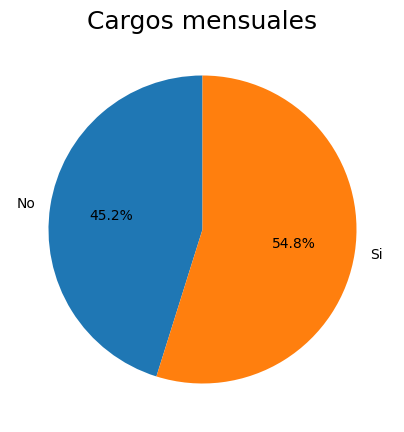

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(ev_cargos_porcentual['Mensual'], labels=ev_cargos_porcentual.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Cargos mensuales', fontsize=18)

plt.show()

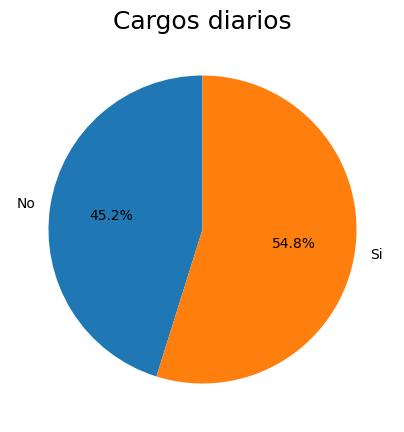

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(ev_cargos_porcentual['Diaria'], labels=ev_cargos_porcentual.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Cargos diarios', fontsize=18)

plt.show()

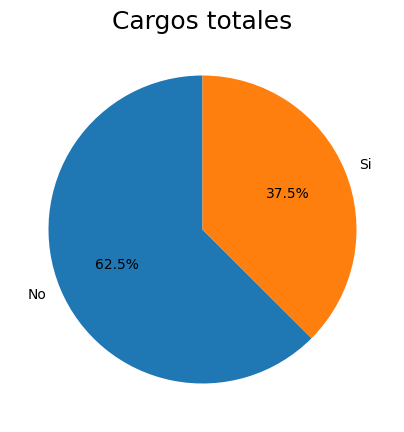

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(ev_cargos_porcentual['Total'], labels=ev_cargos_porcentual.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Cargos totales', fontsize=18)

plt.show()

##**Insights**

* Respecto a los cambios de servicios, dependientes del genero se tiene que quienes tienen una mayor inlcinación a cambio de servicio son los Hombres.

* Respecto el tipo de contrato los contratos que menos influencia a la evasión tienen, son los de 2 años o los de mes a mes.

* Respecto al metodo de pago con el cheque electronico es el metodo con  el cual se tiene mas evasiones.

* Del gráfico de cargos mensuales, se puede observar que tenemos un mayor numero de personas que cambian el servicio, sin embargo esto al hacer el analisis de cargos totales, podemos vislumbrar que son mas los clientes que continuan con el servicio, por lo que se requiere crear estrategias para mantener a los clientes que facturan mes a mes.

#📄Informe final

##**Introducción**
El objetivo del analisis es encontrar factores que promuevan que los clientes cambien de servicio, entnediendo estos factores se pueden crear estrategias para la retención de la clientela fiel e incentivar a la clientela a conocer los servicios como su mejor opción.

##**Limpieza y Tratamiento de Datos**
* Se importan los datos y se comienza crear tablas seccionales, debido a como se integro la información en el archivo json, un ves lograda estas tablas se integran todas en un solo dataset.

* Se analizan los tipos de datos y los valores nulos, continuando con la asignación correcta de cada tipo de dato y la transformación adecuada de estos.

##**Análisis Exploratorio de Datos**
* Una vez logrado la tabla completa, se comienza con el analisis de variables con enfasis en la evasión "churn", para identificar los factores ligados al comportamiento de los clientes referente al cambio de servicio.



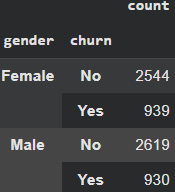

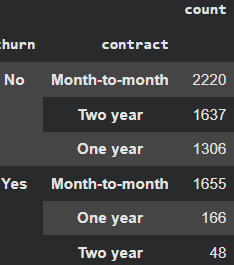

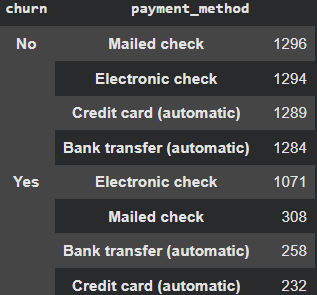

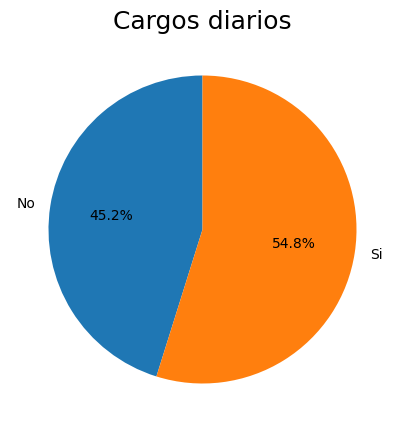

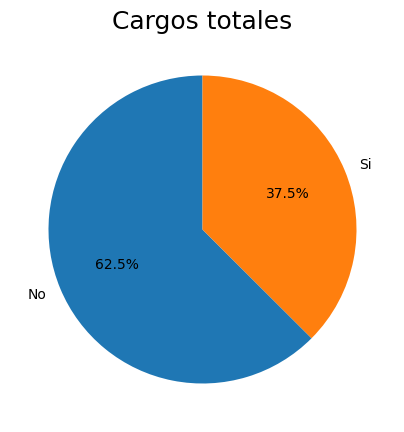

##**Conclusiones e Insights**
* Respecto a los cambios de servicios, dependientes del genero se tiene que quienes tienen una mayor inlcinación a cambio de servicio son los Hombres.

* Respecto el tipo de contrato los contratos que menos influencia a la evasión tienen, son los de 2 años o los de mes a mes.

* Respecto al metodo de pago con el cheque electronico es el metodo con  el cual se tiene mas evasiones.


##**Recomendaciones**
* Del gráfico de cargos mensuales, se puede observar que tenemos un mayor numero de personas que cambian el servicio, sin embargo esto al hacer el analisis de cargos totales, podemos vislumbrar que son mas los clientes que continuan con el servicio, por lo que se requiere crear estrategias para mantener a los clientes que facturan mes a mes.